# 서울시 상권분석 서비스에서 전처리 한 최종 데이터 파일 last.csv 파일 불러오기

In [1]:
import pandas as pd

# "last.csv" 파일을 읽어와 변수 a에 저장합니다.
a = pd.read_csv("last.csv")

In [2]:
a

,상권_코드,월_평균_소득_금액,소득_구간_코드,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2110001,4.453866e+06,8.0625,98.5000,61.4375,110.1875,53.5625,1121.3750,526.5000,594.8750,...,0.0,0.0,0.0000,0.6875,0.0000,0.0,0.0,0.0,0.0,4.5625
1,2110002,3.363814e+06,7.0000,131.3750,60.9375,110.1875,53.5625,637.1875,308.1875,329.0000,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.0,3.0000
2,2110003,3.540374e+06,7.0000,115.5625,57.8750,110.1875,53.5625,3218.0625,1526.0000,1692.0625,...,0.0,0.0,0.6875,0.6875,0.6875,0.0,0.0,0.0,0.0,6.2500
3,2110004,2.658326e+06,6.0000,155.1250,77.8125,110.1875,53.5625,478.3750,226.6250,251.7500,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,2.0000
4,2110005,3.696801e+06,7.1875,117.2500,58.1875,110.1875,53.5625,1809.2500,862.1250,947.1250,...,0.0,0.0,0.0000,0.6875,0.6875,0.0,0.0,0.0,0.0,5.3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,2111086,2.846439e+06,6.0000,102.0000,47.6250,110.1875,53.5625,2506.6875,1223.1875,1283.5000,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,4.6875
1056,2111087,2.480119e+06,5.8750,119.5000,54.2500,110.1875,53.5625,2618.0625,1395.9375,1222.1250,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,2.3125
1057,2111088,2.382881e+06,5.1875,105.6250,54.4375,110.1875,53.5625,2106.2500,1090.8750,1015.3750,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,5.3750
1058,2111089,2.499357e+06,6.0000,105.5625,54.2500,110.1875,53.5625,4033.8125,2060.3750,1973.4375,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,3.6875


In [3]:
# 컬럼명 확인
a.columns

Index(['상권_코드', '월_평균_소득_금액', '소득_구간_코드', '운영_영업_개월_평균', '폐업_영업_개월_평균',
       '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균', '총_상주인구_수', '남성_상주인구_수',
       '여성_상주인구_수',
       ...
       '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '공항_수', '철도_역_수',
       '버스_터미널_수', '지하철_역_수', '버스_정거장_수'],
      dtype='object', length=199)

### 업종별 변수 추출

In [4]:
# 변수 a에서 선택적으로 업종별 열(column)을 추출하여 변수 b에 저장합니다.
b= a[['상권_코드','교육_prob',
       '기타_개인_서비스_prob', '보건_prob', '소매업_prob', '스포츠_및_오락관련_서비스업_prob',
       '식료품_prob', '음료_prob', '음식점_prob', '의류_미용_prob', '주점업_prob']]

# 클러스터링

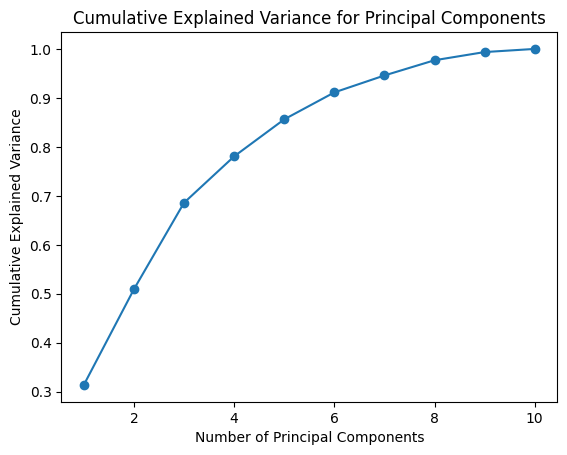

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# '상권_코드' 인덱스를 미리 저장
codes = b['상권_코드']

# 모든 특성 선택
all_features = b.drop(columns=['상권_코드'])  # 상권_코드는 클러스터링에 사용하지 않음

# NaN 값을 처리하는 Imputer 사용
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(all_features)

# Min-Max 정규화
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(imputed_data)

# 주성분 개수 선택을 위한 누적 설명 분산 계산 pca
max_components = min(normalized_data.shape[0], normalized_data.shape[1])  # 최대 주성분 개수는 특성 개수와 데이터 개수 중 작은 값
pca = PCA(n_components=max_components)
explained_variance_ratio = pca.fit(normalized_data).explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명 분산을 시각화하여 적절한 주성분 개수 선택
import matplotlib.pyplot as plt
plt.plot(range(1, max_components + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for Principal Components')
plt.show()


In [6]:
# 누적 설명 분산 그래프를 통해 엘보우 지점 찾기
elbow_point = 0
for i in range(1, max_components + 1):
    if cumulative_variance_ratio[i - 1] >= 0.90:  # 예를 들어, 90%의 설명 분산을 유지하도록 선택 보통 (75%~95%)
        elbow_point = i
        break

print("Elbow Point (90% of Cumulative Variance):", elbow_point)



Elbow Point (90% of Cumulative Variance): 6


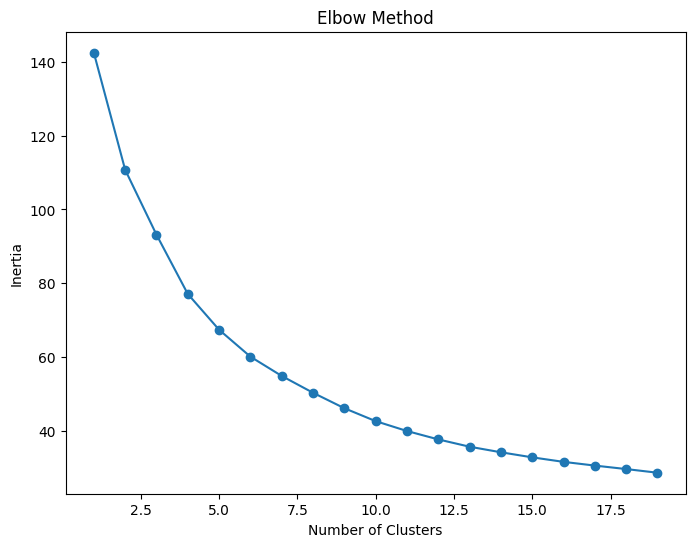

In [7]:
from sklearn.cluster import KMeans
# PCA 적용
pca = PCA(n_components=6)
X_pca = pca.fit_transform(normalized_data)

# Elbow Method로 적절한 클러스터 개수 결정
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # n_init 설정10으로 해놔야 일반적 방법
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Elbow 그래프 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [8]:
# 선택한 클러스터 개수로 K-means 클러스터링 수행
desired_clusters = 5  # 팔굼치 구간이 클러스터 개수
kmeans = KMeans(n_clusters=desired_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

## 클러스터링 결과

Cluster Counts:
Cluster
2    387
1    264
4    177
3    135
0     97
Name: count, dtype: int64


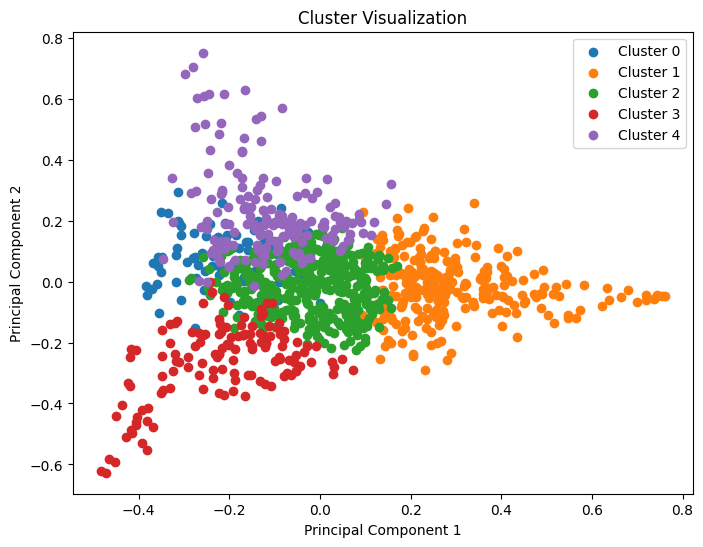

In [9]:
# 클러스터별 데이터 분석 및 시각화 예시
cluster_data = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, 7)])
cluster_data['Cluster'] = cluster_labels

# 클러스터별 데이터 개수 출력
cluster_counts = cluster_data['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# 클러스터별 데이터 특성 시각화
plt.figure(figsize=(8, 6))
for cluster_num in range(desired_clusters):
    cluster_subset = cluster_data[cluster_data['Cluster'] == cluster_num]
    plt.scatter(cluster_subset['PC1'], cluster_subset['PC2'], label=f'Cluster {cluster_num}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization')
plt.legend()
plt.show()


# 군집별 변수 기여도 추출

Cluster 1 원본 변수 기여도:
변수 1: 0.1184
변수 2: 0.0077
변수 3: 0.0708
변수 4: 0.3960
변수 5: 0.0431
변수 6: 0.1253
변수 7: 0.0066
변수 8: 0.1331
변수 9: 0.0664
변수 10: 0.0327



/var/folders/zn/z7q7zstd5jg_tg51vl5zplj80000gn/T/ipykernel_29472/2014204828.py:27: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  plt.tight_layout()
/var/folders/zn/z7q7zstd5jg_tg51vl5zplj80000gn/T/ipykernel_29472/2014204828.py:27: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/var/folders/zn/z7q7zstd5jg_tg51vl5zplj80000gn/T/ipykernel_29472/2014204828.py:27: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  plt.tight_layout()
/var/folders/zn/z7q7zstd5jg_tg51vl5zplj80000gn/T/ipykernel_29472/2014204828.py:27: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  plt.tight_layout()
/var/folders/zn/z7q7zstd5jg_tg51vl5zplj80000gn/T/ipykernel_29472/2014204828.py:27: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
/var/folders/zn/z7q7zstd5jg_tg51vl5zplj80000gn/T/ipykernel_29472/2014204828.py:27: UserWar

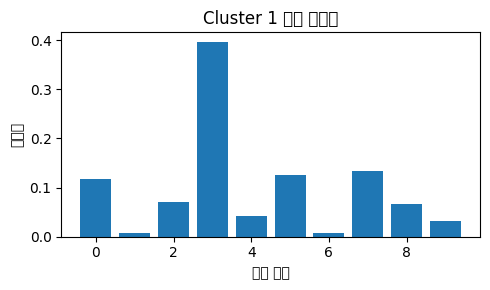

Cluster 2 원본 변수 기여도:
변수 1: 0.0960
변수 2: 0.0164
변수 3: 0.1398
변수 4: 0.0993
변수 5: 0.0531
변수 6: 0.3288
변수 7: 0.0268
변수 8: 0.1457
변수 9: 0.0518
변수 10: 0.0422



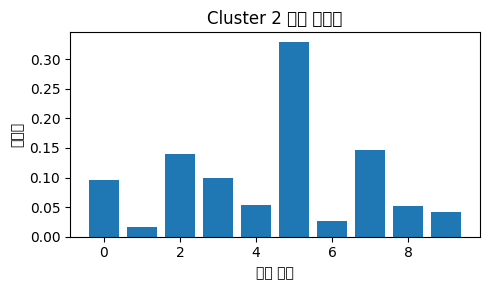

Cluster 3 원본 변수 기여도:
변수 1: 0.1555
변수 2: 0.0437
변수 3: 0.0616
변수 4: 0.0486
변수 5: 0.0786
변수 6: 0.1094
변수 7: 0.1160
변수 8: 0.0753
변수 9: 0.2196
변수 10: 0.0915



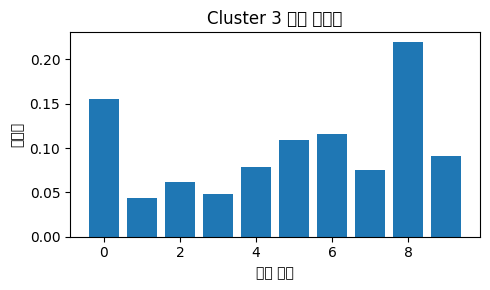

Cluster 4 원본 변수 기여도:
변수 1: 0.0524
변수 2: 0.0150
변수 3: 0.0715
변수 4: 0.0942
변수 5: 0.0536
변수 6: 0.1735
변수 7: 0.0839
변수 8: 0.3464
변수 9: 0.0607
변수 10: 0.0488



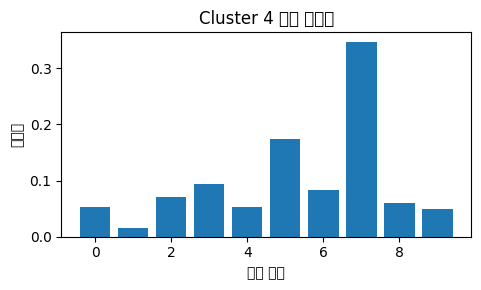

Cluster 5 원본 변수 기여도:
변수 1: 0.0608
변수 2: 0.0073
변수 3: 0.4033
변수 4: 0.0651
변수 5: 0.0680
변수 6: 0.1616
변수 7: 0.0206
변수 8: 0.1129
변수 9: 0.0536
변수 10: 0.0468



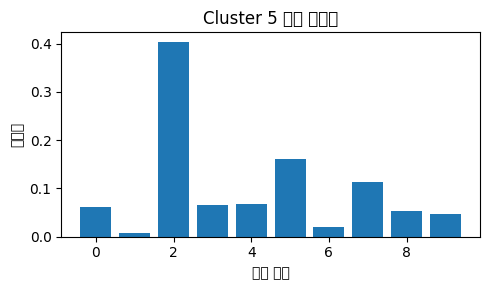

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 각 군집별 변수 기여도 계산 및 출력 및 막대 그래프 시각화
for cluster_id in range(desired_clusters):
    # 해당 군집에 속하는 데이터 추출
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_data = normalized_data[cluster_indices]
    
    # 해당 군집의 원본 변수 기여도 계산
    cluster_variances = np.var(cluster_data, axis=0)
    cluster_total_variance = np.sum(cluster_variances)
    cluster_contributions = cluster_variances / cluster_total_variance
    
    # 변수 기여도 출력
    print(f"Cluster {cluster_id + 1} 원본 변수 기여도:")
    for var_id, contribution in enumerate(cluster_contributions):
        print(f"변수 {var_id + 1}: {contribution:.4f}")
    print()
    
    # 막대 그래프로 변수 기여도 시각화
    plt.figure(figsize=(5, 3))
    plt.bar(range(len(cluster_contributions)), cluster_contributions)
    plt.xlabel('변수 번호')
    plt.ylabel('기여도')
    plt.title(f'Cluster {cluster_id + 1} 변수 기여도')
    plt.tight_layout()
    plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/sit

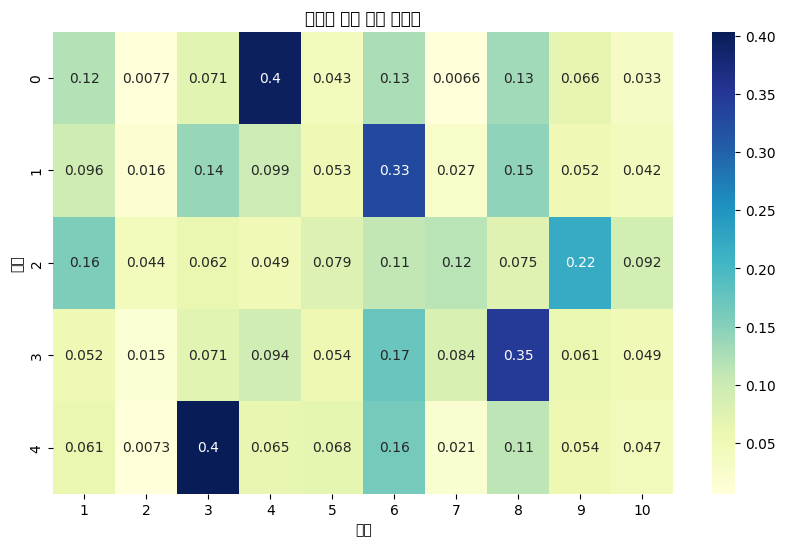

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 군집별로 원본 변수의 기여도 계산 및 저장
cluster_contributions_list = []

for cluster_id in range(desired_clusters):
    # 해당 군집에 속하는 데이터 추출
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_data = normalized_data[cluster_indices]
    
    # 해당 군집의 원본 변수 기여도 계산
    cluster_variances = np.var(cluster_data, axis=0)
    cluster_total_variance = np.sum(cluster_variances)
    cluster_contributions = cluster_variances / cluster_total_variance
    
    cluster_contributions_list.append(cluster_contributions)

# 군집별 변수 기여도를 히트맵으로 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_contributions_list, annot=True, cmap='YlGnBu', xticklabels=range(1, 11))
plt.xlabel('변수')
plt.ylabel('군집')
plt.title('군집별 원본 변수 기여도')
plt.show()


# 클러스터링 완료한 군집 5개의 데이터 프레임을 csv파일로 저장

In [12]:
# 다른 열들과 함께 클러스터 데이터프레임 생성
cluster_dataframes = {}
for cluster_id in range(desired_clusters):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_data = b.iloc[cluster_indices].copy()  # 해당하는 데이터 추출
    cluster_data['Cluster'] = cluster_id  # 'Cluster' 열 추가
    cluster_dataframes[f'cluster{cluster_id + 1}'] = cluster_data

# 개별 군집 데이터프레임뽑아 내야함
for cluster_name, cluster_df in cluster_dataframes.items():
    globals()[cluster_name] = cluster_df  # 변수로 저장


In [13]:
cluster1

,상권_코드,교육_prob,기타_개인_서비스_prob,보건_prob,소매업_prob,스포츠_및_오락관련_서비스업_prob,식료품_prob,음료_prob,음식점_prob,의류_미용_prob,주점업_prob,Cluster
6,2110007,0.000,0.000,0.000,0.593,0.000,0.126,0.020,0.022,0.000,0.000,0
31,2110032,0.000,0.000,0.000,0.767,0.000,0.000,0.023,0.184,0.009,0.017,0
36,2110037,0.000,0.005,0.000,0.328,0.011,0.323,0.029,0.218,0.052,0.029,0
42,2110043,0.007,0.004,0.198,0.306,0.008,0.262,0.021,0.144,0.022,0.013,0
54,2110055,0.000,0.000,0.128,0.386,0.000,0.002,0.031,0.326,0.061,0.060,0
...,...,...,...,...,...,...,...,...,...,...,...,...
980,2111009,0.000,0.000,0.006,0.302,0.121,0.188,0.028,0.146,0.027,0.031,0
987,2111016,0.100,0.014,0.227,0.293,0.000,0.181,0.020,0.031,0.015,0.048,0
992,2111022,0.171,0.047,0.000,0.441,0.000,0.273,0.007,0.003,0.000,0.025,0
1036,2111067,0.009,0.016,0.049,0.369,0.015,0.263,0.024,0.155,0.009,0.028,0


In [14]:
cluster2

,상권_코드,교육_prob,기타_개인_서비스_prob,보건_prob,소매업_prob,스포츠_및_오락관련_서비스업_prob,식료품_prob,음료_prob,음식점_prob,의류_미용_prob,주점업_prob,Cluster
7,2110008,0.006,0.016,0.020,0.055,0.000,0.436,0.117,0.212,0.026,0.088,1
9,2110010,0.105,0.023,0.087,0.037,0.013,0.420,0.091,0.089,0.043,0.090,1
19,2110020,0.006,0.010,0.114,0.014,0.005,0.437,0.013,0.208,0.000,0.153,1
25,2110026,0.000,0.000,0.234,0.302,0.000,0.384,0.010,0.019,0.051,0.000,1
27,2110028,0.030,0.003,0.042,0.080,0.001,0.629,0.030,0.086,0.082,0.014,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1040,2111071,0.007,0.012,0.000,0.128,0.000,0.535,0.035,0.164,0.000,0.000,1
1051,2111082,0.242,0.073,0.000,0.120,0.000,0.502,0.063,0.000,0.000,0.000,1
1052,2111083,0.105,0.061,0.036,0.025,0.021,0.416,0.068,0.081,0.031,0.108,1
1054,2111085,0.073,0.016,0.150,0.018,0.010,0.462,0.029,0.166,0.005,0.044,1


In [15]:
cluster3

,상권_코드,교육_prob,기타_개인_서비스_prob,보건_prob,소매업_prob,스포츠_및_오락관련_서비스업_prob,식료품_prob,음료_prob,음식점_prob,의류_미용_prob,주점업_prob,Cluster
2,2110003,0.075,0.077,0.091,0.078,0.047,0.264,0.130,0.063,0.073,0.100,2
4,2110005,0.225,0.017,0.017,0.006,0.001,0.305,0.033,0.201,0.044,0.134,2
5,2110006,0.087,0.000,0.000,0.000,0.000,0.238,0.113,0.176,0.000,0.386,2
12,2110013,0.000,0.000,0.000,0.000,0.000,0.000,0.135,0.000,0.865,0.000,2
17,2110018,0.000,0.004,0.000,0.012,0.000,0.298,0.118,0.225,0.227,0.038,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2111075,0.047,0.038,0.207,0.054,0.005,0.384,0.069,0.169,0.010,0.009,2
1046,2111077,0.033,0.014,0.199,0.017,0.007,0.367,0.015,0.217,0.085,0.022,2
1047,2111078,0.058,0.035,0.107,0.184,0.019,0.190,0.076,0.191,0.011,0.051,2
1049,2111080,0.053,0.035,0.016,0.021,0.005,0.291,0.142,0.275,0.056,0.067,2


In [16]:
cluster4

,상권_코드,교육_prob,기타_개인_서비스_prob,보건_prob,소매업_prob,스포츠_및_오락관련_서비스업_prob,식료품_prob,음료_prob,음식점_prob,의류_미용_prob,주점업_prob,Cluster
0,2110001,0.016,0.000,0.000,0.022,0.027,0.270,0.027,0.498,0.001,0.091,3
3,2110004,0.130,0.034,0.104,0.000,0.006,0.038,0.014,0.646,0.000,0.010,3
8,2110009,0.129,0.012,0.000,0.075,0.000,0.101,0.182,0.427,0.014,0.058,3
10,2110011,0.000,0.000,0.000,0.000,0.000,0.000,0.024,0.976,0.000,0.000,3
11,2110012,0.019,0.040,0.014,0.006,0.002,0.132,0.136,0.447,0.083,0.064,3
...,...,...,...,...,...,...,...,...,...,...,...,...
984,2111013,0.004,0.024,0.011,0.262,0.027,0.133,0.088,0.352,0.021,0.063,3
985,2111014,0.000,0.021,0.000,0.131,0.025,0.181,0.052,0.519,0.006,0.032,3
993,2111023,0.002,0.010,0.006,0.012,0.035,0.315,0.022,0.436,0.093,0.060,3
1023,2111054,0.260,0.097,0.000,0.010,0.000,0.000,0.011,0.490,0.004,0.000,3


In [17]:
cluster5

,상권_코드,교육_prob,기타_개인_서비스_prob,보건_prob,소매업_prob,스포츠_및_오락관련_서비스업_prob,식료품_prob,음료_prob,음식점_prob,의류_미용_prob,주점업_prob,Cluster
1,2110002,0.059,0.003,0.361,0.135,0.016,0.236,0.012,0.051,0.027,0.064,4
49,2110050,0.005,0.011,0.400,0.001,0.000,0.134,0.013,0.391,0.000,0.045,4
51,2110052,0.002,0.019,0.270,0.080,0.035,0.180,0.028,0.233,0.088,0.036,4
65,2110066,0.000,0.002,0.269,0.111,0.005,0.287,0.030,0.260,0.000,0.028,4
70,2110071,0.098,0.072,0.270,0.005,0.016,0.284,0.045,0.095,0.089,0.026,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1050,2111081,0.000,0.018,0.340,0.207,0.023,0.000,0.003,0.000,0.182,0.040,4
1053,2111084,0.111,0.002,0.252,0.274,0.016,0.130,0.000,0.066,0.127,0.000,4
1057,2111088,0.010,0.006,0.499,0.050,0.008,0.087,0.024,0.187,0.000,0.046,4
1058,2111089,0.033,0.012,0.329,0.089,0.025,0.111,0.058,0.258,0.008,0.056,4


In [18]:
#클러스터 1~5 csv파일로 저장
cluster1.to_csv("cluster1.csv")
cluster2.to_csv("cluster2.csv")
cluster3.to_csv("cluster3.csv")
cluster4.to_csv("cluster4.csv")
cluster5.to_csv("cluster5.csv")